In [1]:
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [2]:
# Read the data frame
df = pd.read_csv('Bank Churn Modelling.csv', delimiter=',')
df.shape

(10000, 13)

In [3]:
# Check columns list and missing values
df.isnull().sum()

CustomerId          0
Surname             0
CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
Num Of Products     0
Has Credit Card     0
Is Active Member    0
Estimated Salary    0
Churn               0
dtype: int64

In [4]:
#finding no missing value 

In [5]:
# Get unique count for each variable
df.nunique()

CustomerId          10000
Surname              2932
CreditScore           460
Geography               3
Gender                  2
Age                    70
Tenure                 11
Balance              6382
Num Of Products         4
Has Credit Card         2
Is Active Member        2
Estimated Salary     9999
Churn                   2
dtype: int64

In [6]:
# Drop the columns as explained above
df = df.drop([ "CustomerId", "Surname"], axis = 1)

In [7]:
# Review the top rows of what is left of the data frame
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
# Check variable data types
df.dtypes

CreditScore           int64
Geography            object
Gender               object
Age                   int64
Tenure                int64
Balance             float64
Num Of Products       int64
Has Credit Card       int64
Is Active Member      int64
Estimated Salary    float64
Churn                 int64
dtype: object

In [9]:
#Exploratory Data Analysis

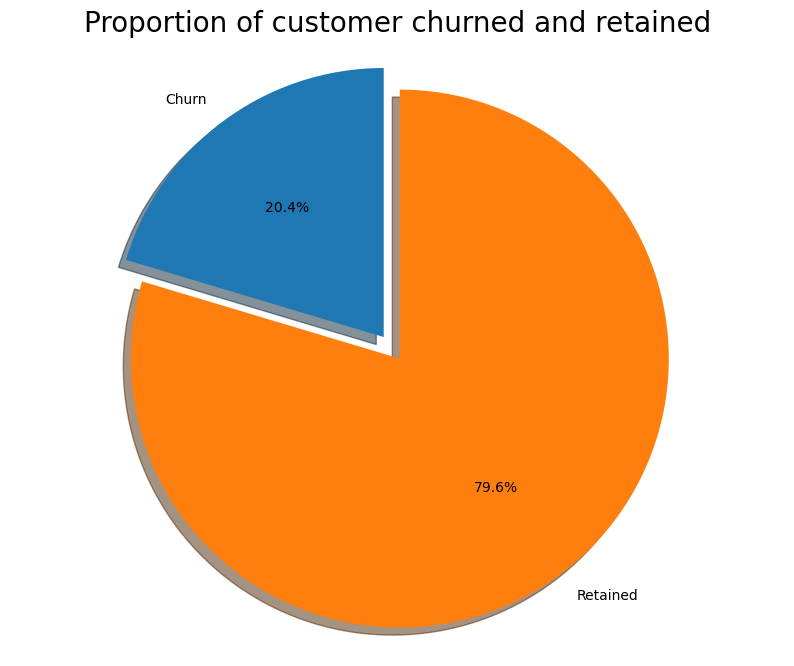

In [10]:
# Exploratory Data Analysis
labels = 'Churn', 'Retained'
sizes = [df.Churn[df['Churn'] == 1].count(), df.Churn[df['Churn'] == 0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size=20)
plt.show()


<AxesSubplot:xlabel='Is Active Member', ylabel='count'>

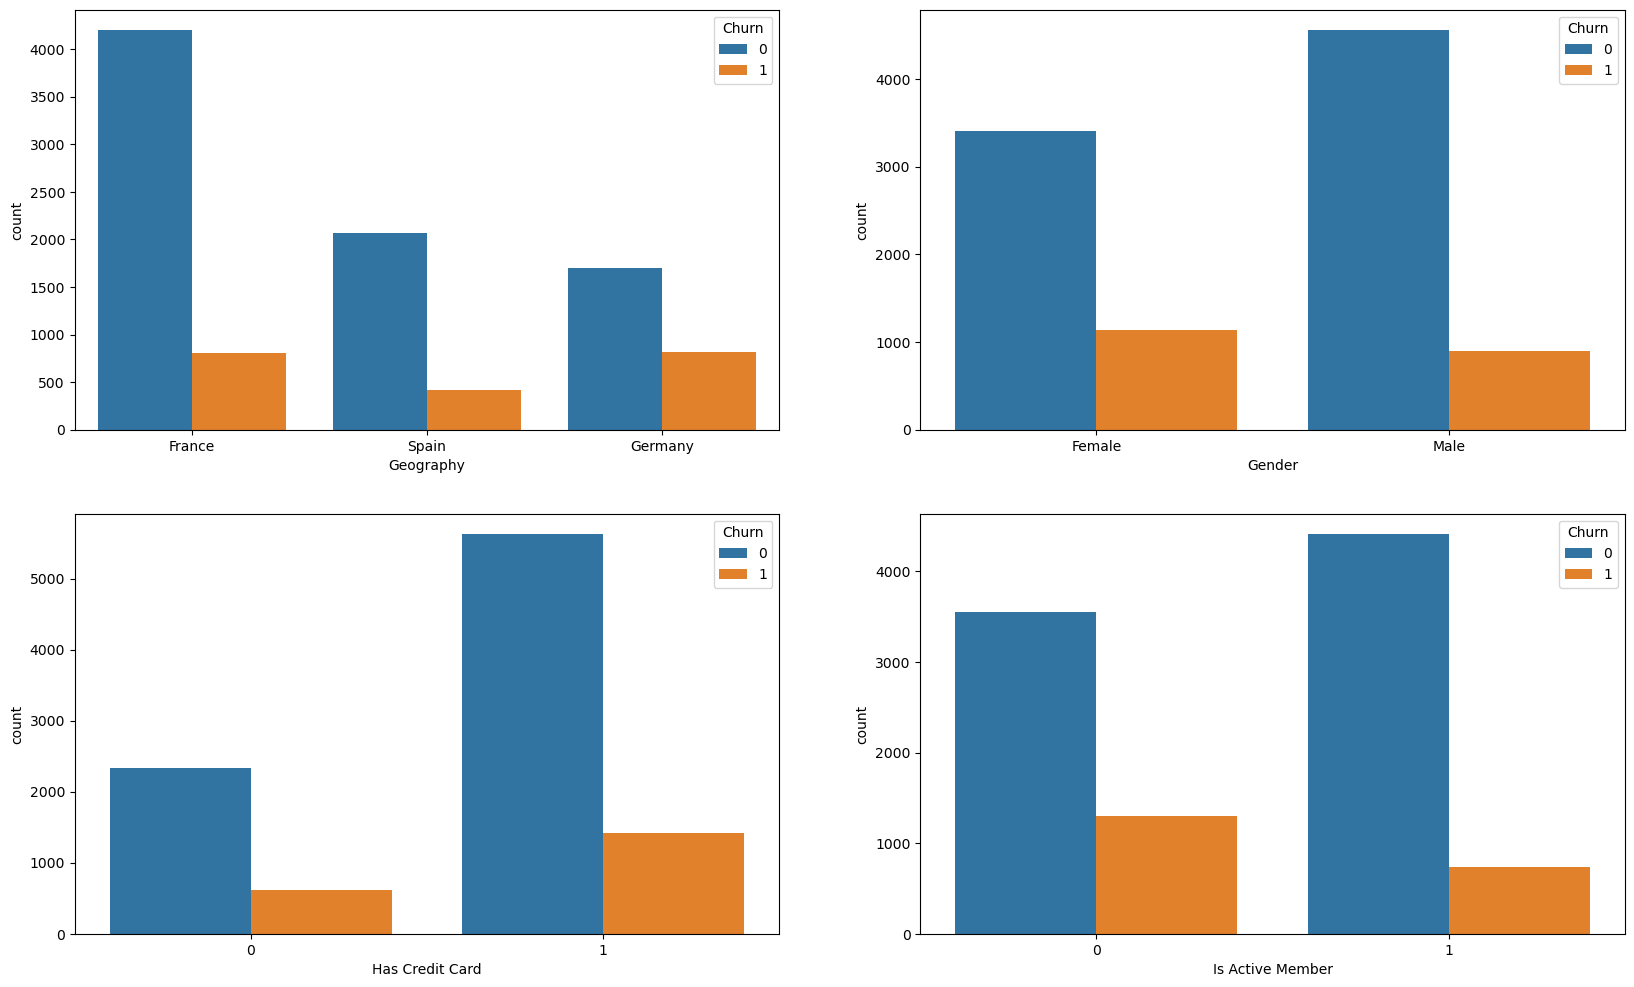

In [11]:
# We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue='Churn', data=df, ax=axarr[0][0])
sns.countplot(x='Gender', hue='Churn', data=df, ax=axarr[0][1])
sns.countplot(x='Has Credit Card', hue='Churn', data=df, ax=axarr[1][0])
sns.countplot(x='Is Active Member', hue='Churn', data=df, ax=axarr[1][1])


<AxesSubplot:xlabel='Churn', ylabel='Estimated Salary'>

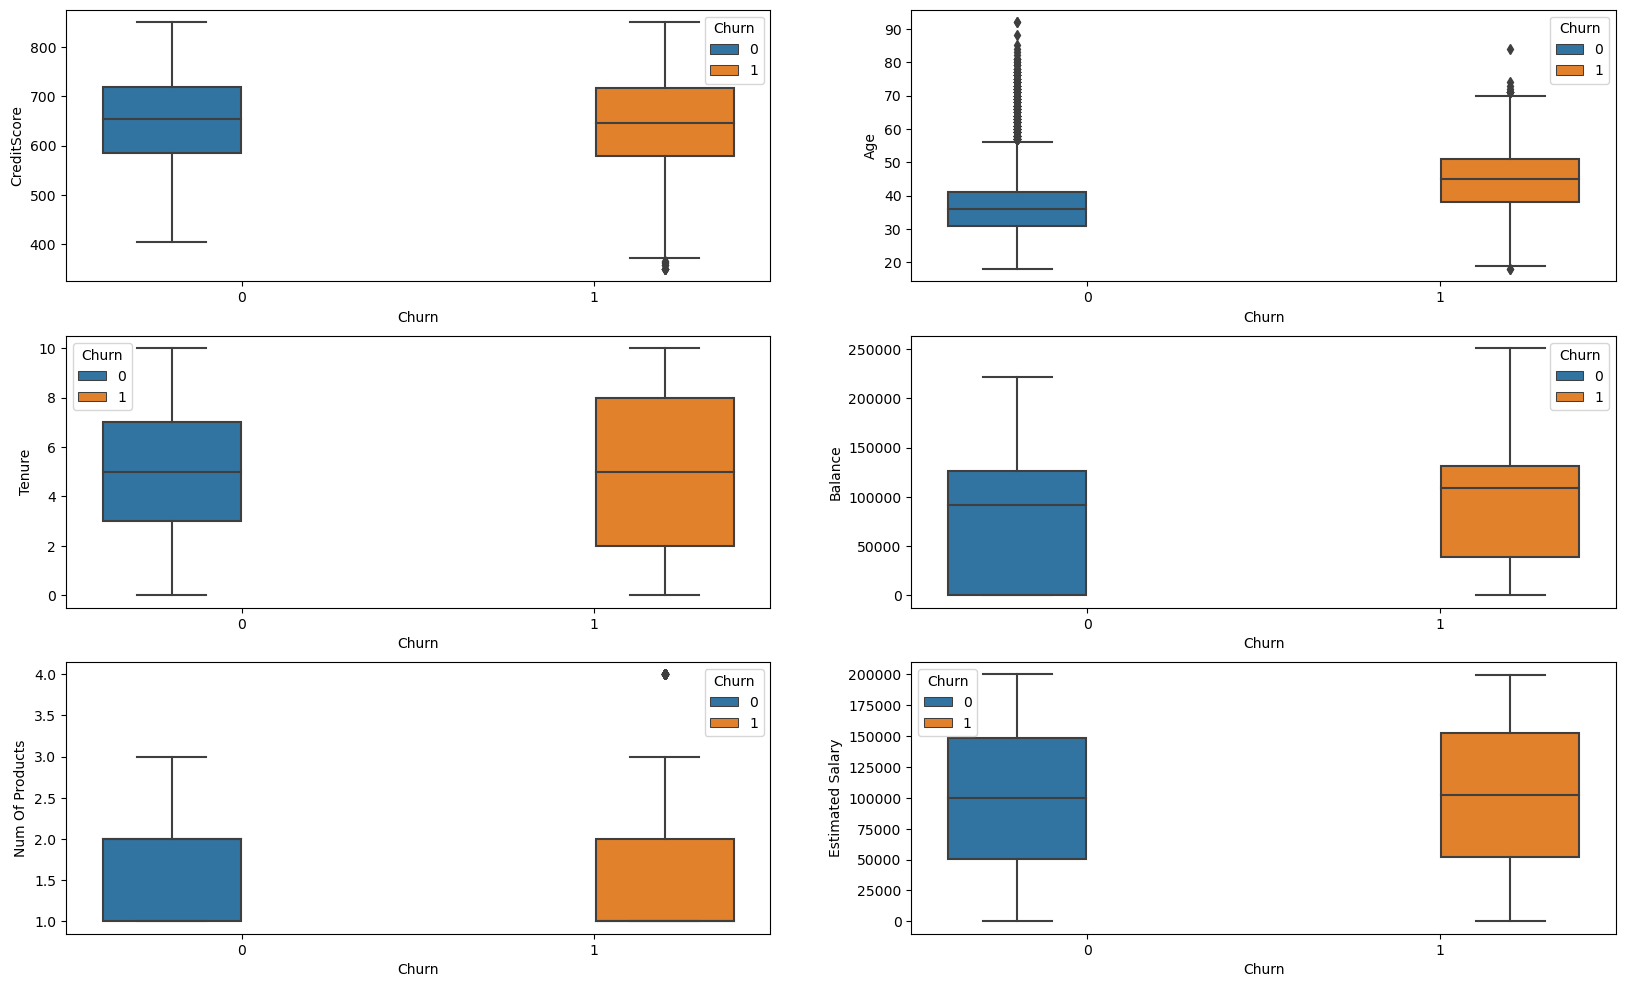

In [12]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore', x='Churn', hue='Churn', data=df, ax=axarr[0][0])
sns.boxplot(y='Age', x='Churn', hue='Churn', data=df, ax=axarr[0][1])
sns.boxplot(y='Tenure', x='Churn', hue='Churn', data=df, ax=axarr[1][0])
sns.boxplot(y='Balance', x='Churn', hue='Churn', data=df, ax=axarr[1][1])
sns.boxplot(y='Num Of Products', x='Churn', hue='Churn', data=df, ax=axarr[2][0])
sns.boxplot(y='Estimated Salary', x='Churn', hue='Churn', data=df, ax=axarr[2][1])


In [13]:
#Feature engineering

In [14]:
# Split Train, test data
df_train = df.sample(frac=0.8,random_state=200)
df_test = df.drop(df_train.index)
print(len(df_train))
print(len(df_test))

8000
2000


(-1.0, 5.0)

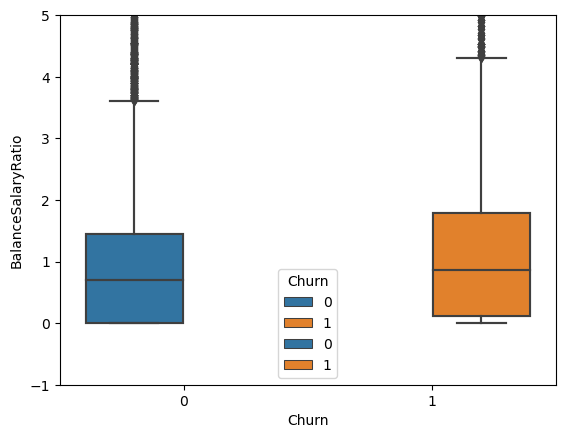

In [15]:
df_train['BalanceSalaryRatio'] = df_train['Balance'] / df_train['Estimated Salary']
sns.boxplot(y='BalanceSalaryRatio', x='Churn', hue='Churn', data=df_train)
plt.ylim(-1, 5)
sns.boxplot(y='BalanceSalaryRatio', x='Churn', hue='Churn', data=df_train)
plt.ylim(-1, 5)


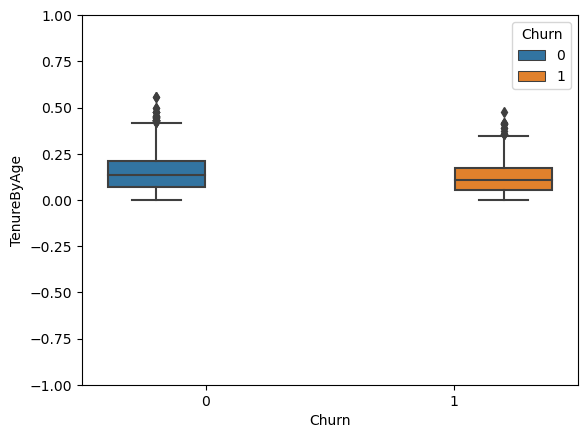

In [16]:
df_train['TenureByAge'] = df_train['Tenure'] / df_train['Age']
sns.boxplot(y='TenureByAge', x='Churn', hue='Churn', data=df_train)
plt.ylim(-1, 1)
plt.show()


In [17]:
df_train['CreditScoreGivenAge'] = df_train.CreditScore/(df_train.Age)

In [18]:
# Resulting Data Frame
df_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
8159,461,Spain,Female,25,6,0.00,2,1,1,15306.29,0,0.000000,0.240000,18.440000
6332,619,France,Female,35,4,90413.12,1,1,1,20555.21,0,4.398550,0.114286,17.685714
8895,699,France,Female,40,8,122038.34,1,1,0,102085.35,0,1.195454,0.200000,17.475000
5351,558,Germany,Male,41,2,124227.14,1,1,1,111184.67,0,1.117305,0.048780,13.609756
4314,638,France,Male,34,5,133501.36,1,0,1,155643.04,0,0.857741,0.147059,18.764706


In [19]:
#Data prep for model fitting

In [21]:
# Arrange columns by data type for easier manipulation
continuous_vars = ['CreditScore', 'Age', 'Tenure', 'Balance', 'Num Of Products', 'Estimated Salary', 'BalanceSalaryRatio', 'TenureByAge', 'CreditScoreGivenAge']
cat_vars = ['Has Credit Card', 'Is Active Member', 'Geography', 'Gender']  # Corrected column names

# Combine all variables
selected_vars = ['Churn'] + continuous_vars + cat_vars

# Select the columns in the DataFrame
df_train = df_train[selected_vars]
df_train.head()


,Churn,CreditScore,Age,Tenure,Balance,Num Of Products,Estimated Salary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,Has Credit Card,Is Active Member,Geography,Gender
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,Spain,Female
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,France,Female
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,0,France,Female
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,Germany,Male
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,0,1,France,Male


In [23]:
df_train.loc[df_train['Has Credit Card'] == 0, 'Has Credit Card'] = -1
df_train.loc[df_train['Is Active Member'] == 0, 'Is Active Member'] = -1
df_train.head()


,Churn,CreditScore,Age,Tenure,Balance,Num Of Products,Estimated Salary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,Has Credit Card,Is Active Member,Geography,Gender
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,Spain,Female
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,France,Female
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,-1,France,Female
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,Germany,Male
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,-1,1,France,Male


In [26]:
# Categorical variables for one-hot encoding
lst = ['Geography', 'Gender']

# Initialize a list to store columns to remove later
remove = list()

# Iterate through categorical variables
for i in lst:
    # Check if the variable is of string or object data type
    if (df_train[i].dtype == str or df_train[i].dtype == object):
        # Iterate through unique values in the categorical column
        for j in df_train[i].unique():
            # Create a new binary column for each unique category
            df_train[i + '_' + j] = np.where(df_train[i] == j, 1, -1)
        # Add the original categorical column to the list of columns to remove
        remove.append(i)

# Drop the original categorical columns
df_train = df_train.drop(remove, axis=1)

# Display the modified DataFrame
df_train.head()


C:\Users\ISHIMWE K AHMED\AppData\Local\Temp\ipykernel_11164\4076672460.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[i + '_' + j] = np.where(df_train[i] == j, 1, -1)
C:\Users\ISHIMWE K AHMED\AppData\Local\Temp\ipykernel_11164\4076672460.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[i + '_' + j] = np.where(df_train[i] == j, 1, -1)
C:\Users\ISHIMWE K AHMED\AppData\Local\Temp\ipykernel_11164\4076672460.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

,Churn,CreditScore,Age,Tenure,Balance,Num Of Products,Estimated Salary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,Has Credit Card,Is Active Member,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,1,-1,-1,1,-1
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,-1,1,-1,1,-1
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,-1,-1,1,-1,1,-1
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,-1,-1,1,-1,1
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,-1,1,-1,1,-1,-1,1


In [27]:
# Define the continuous variables for Min-Max scaling
continuous_vars = ['CreditScore', 'Age', 'Tenure', 'Balance', 'Num Of Products', 'Estimated Salary', 'BalanceSalaryRatio', 'TenureByAge', 'CreditScoreGivenAge']

# Calculate the minimum and maximum values for each continuous variable
minVec = df_train[continuous_vars].min().copy()
maxVec = df_train[continuous_vars].max().copy()

# Perform Min-Max scaling on the continuous variables
df_train[continuous_vars] = (df_train[continuous_vars] - minVec) / (maxVec - minVec)

# Display the modified DataFrame
df_train.head()


,Churn,CreditScore,Age,Tenure,Balance,Num Of Products,Estimated Salary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,Has Credit Card,Is Active Member,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
8159,0,0.222,0.094595,0.6,0.000000,0.333333,0.076118,0.000000,0.432000,0.323157,1,1,1,-1,-1,1,-1
6332,0,0.538,0.229730,0.4,0.360358,0.000000,0.102376,0.003317,0.205714,0.305211,1,1,-1,1,-1,1,-1
8895,0,0.698,0.297297,0.8,0.486406,0.000000,0.510225,0.000901,0.360000,0.300198,1,-1,-1,1,-1,1,-1
5351,0,0.416,0.310811,0.2,0.495130,0.000000,0.555744,0.000843,0.087805,0.208238,1,1,-1,-1,1,-1,1
4314,0,0.576,0.216216,0.5,0.532094,0.000000,0.778145,0.000647,0.264706,0.330882,-1,1,-1,1,-1,-1,1


In [28]:
def DfPrepPipeline(df_predict, df_train_Cols, minVec, maxVec):
    # Add new features
    df_predict['BalanceSalaryRatio'] = df_predict.Balance / df_predict.EstimatedSalary
    df_predict['TenureByAge'] = df_predict.Tenure / (df_predict.Age - 18)
    df_predict['CreditScoreGivenAge'] = df_predict.CreditScore / (df_predict.Age - 18)
    
    # Reorder the columns
    continuous_vars = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio',
                       'TenureByAge', 'CreditScoreGivenAge']
    cat_vars = ['HasCrCard', 'IsActiveMember', 'Geography', 'Gender']
    df_predict = df_predict[['Exited'] + continuous_vars + cat_vars]
    
    # Change the 0 in categorical variables to -1
    df_predict.loc[df_predict.HasCrCard == 0, 'HasCrCard'] = -1
    df_predict.loc[df_predict.IsActiveMember == 0, 'IsActiveMember'] = -1
    
    # One-hot encode the categorical variables
    lst = ["Geography", "Gender"]
    remove = list()
    for i in lst:
        for j in df_predict[i].unique():
            df_predict[i + '_' + j] = np.where(df_predict[i] == j, 1, -1)
        remove.append(i)
    df_predict = df_predict.drop(remove, axis=1)
    
    # Ensure that all one-hot encoded variables that appear in the train data appear in the subsequent data
    L = list(set(df_train_Cols) - set(df_predict.columns))
    for l in L:
        df_predict[str(l)] = -1

    # Min-Max scaling continuous variables based on min and max from the train data
    df_predict[continuous_vars] = (df_predict[continuous_vars] - minVec) / (maxVec - minVec)
    
    # Ensure that the variables are ordered in the same way as they were ordered in the train set
    df_predict = df_predict[df_train_Cols]
    
    return df_predict


In [29]:
#6. Model fitting and selectio6. Model fitting and selectio

In [30]:
# Support functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [35]:
# Function to give best model score and parameters
def best_model(model):
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method); 
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2); 
    return (auc_score, fpr_df, tpr_df)

In [37]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 0.5, 1, 10, 50, 100],
    'max_iter': [250],
    'fit_intercept': [True],
    'intercept_scaling': [1],
    'penalty': ['l2'],
    'tol': [0.00001, 0.0001, 0.000001]
}

# Create a GridSearchCV object with logistic regression model and the parameter grid
log_primal_Grid = GridSearchCV(LogisticRegression(solver='lbfgs'), param_grid, cv=10, refit=True, verbose=0)

# Fit the model to your training data
log_primal_Grid.fit(df_train.loc[:, df_train.columns != 'Churn'], df_train.Churn)

# Function to print the best model's parameters and score
def best_model(grid):
    print("Best Parameters: ", grid.best_params_)
    print("Best Score: ", grid.best_score_)

# Call the function to print the best model's parameters and score
best_model(log_primal_Grid)


Best Parameters:  {'C': 100, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 250, 'penalty': 'l2', 'tol': 1e-05}
Best Score:  0.8149999999999998


In [38]:


# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 10, 50],
    'max_iter': [300, 500],
    'fit_intercept': [True],
    'intercept_scaling': [1],
    'penalty': ['l2'],
    'tol': [0.0001, 0.000001]
}

# Create a PolynomialFeatures object with degree 2
poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(df_train.loc[:, df_train.columns != 'Churn'])

# Create a GridSearchCV object with logistic regression model and the parameter grid
log_pol2_Grid = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=5, refit=True, verbose=0)

# Fit the model to your polynomial transformed training data
log_pol2_Grid.fit(df_train_pol2, df_train.Churn)

# Function to print the best model's parameters and score
def best_model(grid):
    print("Best Parameters: ", grid.best_params_)
    print("Best Score: ", grid.best_score_)

# Call the function to print the best model's parameters and score
best_model(log_pol2_Grid)


Best Parameters:  {'C': 50, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 300, 'penalty': 'l2', 'tol': 0.0001}
Best Score:  0.8553750000000001


In [39]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.5, 100, 150],
    'gamma': [0.1, 0.01, 0.001],
    'probability': [True],
    'kernel': ['rbf']
}

# Create a GridSearchCV object with Support Vector Machine (SVM) classifier and the parameter grid
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)

# Fit the SVM model to your training data
SVM_grid.fit(df_train.loc[:, df_train.columns != 'Churn'], df_train.Churn)

# Function to print the best model's parameters and score
def best_model(grid):
    print("Best Parameters: ", grid.best_params_)
    print("Best Score: ", grid.best_score_)

# Call the function to print the best model's parameters and score
best_model(SVM_grid)


Best Parameters:  {'C': 100, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}
Best Score:  0.8518747609662071


In [40]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.5, 1, 10, 50, 100],
    'gamma': [0.1, 0.01, 0.001],
    'probability': [True],
    'kernel': ['poly'],
    'degree': [2, 3]
}

# Create a GridSearchCV object with Support Vector Machine (SVM) classifier and the parameter grid
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)

# Fit the SVM model to your training data
SVM_grid.fit(df_train.loc[:, df_train.columns != 'Churn'], df_train.Churn)

# Function to print the best model's parameters and score
def best_model(grid):
    print("Best Parameters: ", grid.best_params_)
    print("Best Score: ", grid.best_score_)

# Call the function to print the best model's parameters and score
best_model(SVM_grid)


Best Parameters:  {'C': 100, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly', 'probability': True}
Best Score:  0.8544999485716948


In [41]:

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 6, 7, 8],
    'max_features': [2, 4, 6, 7, 8, 9],
    'n_estimators': [50, 100],
    'min_samples_split': [3, 5, 6, 7]
}

# Create a GridSearchCV object with Random Forest classifier and the parameter grid
RanFor_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=0)

# Fit the Random Forest model to your training data
RanFor_grid.fit(df_train.loc[:, df_train.columns != 'Churn'], df_train.Churn)

# Function to print the best model's parameters and score
def best_model(grid):
    print("Best Parameters: ", grid.best_params_)
    print("Best Score: ", grid.best_score_)

# Call the function to print the best model's parameters and score
best_model(RanFor_grid)


Best Parameters:  {'max_depth': 8, 'max_features': 9, 'min_samples_split': 7, 'n_estimators': 100}
Best Score:  0.8637499999999999


In [42]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [5, 6, 7, 8],
    'gamma': [0.01, 0.001, 0.001],
    'min_child_weight': [1, 5, 10],
    'learning_rate': [0.05, 0.1, 0.2, 0.3],
    'n_estimators': [5, 10, 20, 100]
}

# Create a GridSearchCV object with XGBoost classifier and the parameter grid
xgb_grid = GridSearchCV(XGBClassifier(), param_grid, cv=5, refit=True, verbose=0)

# Fit the XGBoost model to your training data
xgb_grid.fit(df_train.loc[:, df_train.columns != 'Churn'], df_train.Churn)

# Function to print the best model's parameters and score
def best_model(grid):
    print("Best Parameters: ", grid.best_params_)
    print("Best Score: ", grid.best_score_)

# Call the function to print the best model's parameters and score
best_model(xgb_grid)


Best Parameters:  {'gamma': 0.001, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 5}
Best Score:  0.8629999999999999


In [43]:
#fit best models

In [44]:
# Instantiate the logistic regression model with the desired parameters
log_primal = LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=250, multi_class='warn', n_jobs=None, penalty='l2', random_state=None, solver='lbfgs', tol=1e-05, verbose=0, warm_start=False)

# Fit the logistic regression model to your training data
log_primal.fit(df_train.loc[:, df_train.columns != 'Churn'], df_train.Churn)


ValueError: multi_class should be 'multinomial', 'ovr' or 'auto'. Got warn.

In [ ]:
# Create a PolynomialFeatures object with degree 2
poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(df_train.loc[:, df_train.columns != 'Churn'])

# Instantiate the logistic regression model with the desired parameters
log_pol2 = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=300, multi_class='warn', n_jobs=None, penalty='l2', random_state=None, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

# Fit the logistic regression model to your polynomial transformed training data
log_pol2.fit(df_train_pol2, df_train.Churn)

In [ ]:
# Instantiate the SVM model with the desired parameters
SVM_RBF = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf', max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001, verbose=False)

# Fit the SVM model to your training data
SVM_RBF.fit(df_train.loc[:, df_train.columns != 'Churn'], df_train.Churn)

In [ ]:
# Instantiate the SVM model with the desired parameters
SVM_POL = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly', max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001, verbose=False)

# Fit the SVM model to your training data
SVM_POL.fit(df_train.loc[:, df_train.columns != 'Churn'], df_train.Churn)


In [ ]:
# Instantiate the Random Forest classifier with the desired parameters
RF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', max_depth=8, max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=3, min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None, oob_score=False, random_state=None, verbose=0, warm_start=False)

# Fit the Random Forest model to your training data
RF.fit(df_train.loc[:, df_train.columns != 'Churn'], df_train.Churn)


In [ ]:
# Instantiate the XGBoost classifier with the desired parameters
XGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1, colsample_bytree=1, gamma=0.01, learning_rate=0.1, max_delta_step=0, max_depth=7, min_child_weight=5, missing=None, n_estimators=20, n_jobs=1, nthread=None, objective='binary:logistic', random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=True, subsample=1)

# Fit the XGBoost model to your training data
XGB.fit(df_train.loc[:, df_train.columns != 'Churn'], df_train.Churn)


In [45]:
#Review best model fit accuracy : Keen interest is on the performance in predicting 1's (Customers who churn)

In [50]:
log_primal = LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=250, multi_class='ovr', n_jobs=None, penalty='l2', random_state=None, solver='lbfgs', tol=1e-05, verbose=0, warm_start=False)
log_primal.fit(df_train.loc[:, df_train.columns != 'Churn'], df_train.Churn)


LogisticRegression(C=100, max_iter=250, multi_class='ovr', tol=1e-05)

In [55]:
# Initialize and fit the logistic regression model with polynomial features (log_pol2)
log_pol2 = LogisticRegression(
    C=10,
    class_weight=None,
    dual=False,
    fit_intercept=True,
    intercept_scaling=1,
    max_iter=300,
    multi_class='ovr',  # Set 'multi_class' to 'ovr' for binary classification
    n_jobs=None,
    penalty='l2',
    random_state=None,
    solver='liblinear',
    tol=0.0001,
    verbose=0,
    warm_start=False
)
log_pol2.fit(df_train_pol2, df_train.Churn)

# Predict Churn on the training data using the log_pol2 model
y_pred_log_pol2 = log_pol2.predict(df_train_pol2)

# Print the classification report
print(classification_report(df_train.Churn, y_pred_log_pol2))


              precision    recall  f1-score   support

           0       0.87      0.97      0.92      6353
           1       0.77      0.46      0.57      1647

    accuracy                           0.86      8000
   macro avg       0.82      0.71      0.75      8000
weighted avg       0.85      0.86      0.85      8000



In [58]:
# Predict Churn on the training data using the log_primal model
y_pred_log_primal = log_primal.predict(df_train.loc[:, df_train.columns != 'Churn'])

# Print the classification report
print(classification_report(df_train.Churn, y_pred_log_primal))


              precision    recall  f1-score   support

           0       0.83      0.97      0.89      6353
           1       0.64      0.24      0.35      1647

    accuracy                           0.82      8000
   macro avg       0.73      0.60      0.62      8000
weighted avg       0.79      0.82      0.78      8000



In [61]:

print(classification_report(df_train.Churn, log_primal.predict(df_train.loc[:, df_train.columns != 'Churn'])))


              precision    recall  f1-score   support

           0       0.83      0.97      0.89      6353
           1       0.64      0.24      0.35      1647

    accuracy                           0.82      8000
   macro avg       0.73      0.60      0.62      8000
weighted avg       0.79      0.82      0.78      8000



In [64]:
# Define and train the Random Forest classifier (replace with your data and parameters)
RF = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
RF.fit(df_train.loc[:, df_train.columns != 'Churn'], df_train.Churn)

# Predict on the training data
y_pred_RF = RF.predict(df_train.loc[:, df_train.columns != 'Churn'])

# Print the classification report
print(classification_report(df_train.Churn, y_pred_RF))


              precision    recall  f1-score   support

           0       0.90      0.99      0.94      6353
           1       0.94      0.59      0.72      1647

    accuracy                           0.91      8000
   macro avg       0.92      0.79      0.83      8000
weighted avg       0.91      0.91      0.90      8000



In [65]:
# Predict Churn on the training data using the XGBoost model
y_pred_xgb = XGB.predict(df_train.loc[:, df_train.columns != 'Churn'])

# Print the classification report
print(classification_report(df_train.Churn, y_pred_xgb))


NameError: name 'XGB' is not defined

In [66]:
# Define and train your XGBoost classifier (replace with your actual parameters)
XGB = XGBClassifier(
    max_depth=7,
    gamma=0.01,
    min_child_weight=5,
    learning_rate=0.1,
    n_estimators=20,
    # other parameters...
)

# Fit the XGBoost model to your training data
XGB.fit(df_train.loc[:, df_train.columns != 'Churn'], df_train.Churn)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.01, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=20, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [67]:
# Predict Churn on the training data using the XGBoost model
y_pred_xgb = XGB.predict(df_train.loc[:, df_train.columns != 'Churn'])

# Print the classification report
print(classification_report(df_train.Churn, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6353
           1       0.83      0.53      0.64      1647

    accuracy                           0.88      8000
   macro avg       0.86      0.75      0.79      8000
weighted avg       0.88      0.88      0.87      8000



In [68]:
from sklearn.metrics import roc_auc_score, roc_curve

def get_auc_scores(true_labels, predicted_labels, predicted_probabilities):
    auc = roc_auc_score(true_labels, predicted_probabilities)
    fpr, tpr, _ = roc_curve(true_labels, predicted_probabilities)
    return auc, fpr, tpr


In [70]:
# Assuming 'Churn' is the column representing the true labels in your DataFrame
y = df_train['Churn']


In [75]:
# Assuming you want to use all columns except 'Churn' as features
X = df_train.drop(columns=['Churn'])


In [79]:
log_pol2 = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=300, multi_class='auto', n_jobs=None, 
                              penalty='l2', random_state=None, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
log_pol2.fit(X_pol2, y)



LogisticRegression(C=10, max_iter=300, solver='liblinear')

In [81]:
# Define and train SVM with RBF Kernel
SVM_RBF = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf', max_iter=-1, probability=True, 
              random_state=None, shrinking=True, tol=0.001, verbose=False)
SVM_RBF.fit(X, y)

# Calculate AUC score and ROC curve data for SVM with RBF Kernel
auc_SVM_RBF, fpr_SVM_RBF, tpr_SVM_RBF = get_auc_scores(y, SVM_RBF.predict(X), SVM_RBF.predict_proba(X)[:, 1])


In [83]:
from sklearn.svm import SVC

# Define and train SVM with Polynomial Kernel
SVM_POL = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,  decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',  max_iter=-1,
              probability=True, random_state=None, shrinking=True, tol=0.001, verbose=False)
SVM_POL.fit(X, y)

# Calculate AUC score and ROC curve data for SVM with Polynomial Kernel
auc_SVM_POL, fpr_SVM_POL, tpr_SVM_POL = get_auc_scores(y, SVM_POL.predict(X), SVM_POL.predict_proba(X)[:, 1])


In [84]:
# Assuming you have defined and trained your classifiers (log_primal, log_pol2, SVM_RBF, SVM_POL, RF, XGB)
# ...

# Assuming you have defined the get_auc_scores function
# ...

# Calculate AUC scores and ROC curve data
auc_log_primal, fpr_log_primal, tpr_log_primal = get_auc_scores(y, log_primal.predict(X), log_primal.predict_proba(X)[:, 1])
auc_log_pol2, fpr_log_pol2, tpr_log_pol2 = get_auc_scores(y, log_pol2.predict(X_pol2), log_pol2.predict_proba(X_pol2)[:, 1])
auc_SVM_RBF, fpr_SVM_RBF, tpr_SVM_RBF = get_auc_scores(y, SVM_RBF.predict(X), SVM_RBF.predict_proba(X)[:, 1])
auc_SVM_POL, fpr_SVM_POL, tpr_SVM_POL = get_auc_scores(y, SVM_POL.predict(X), SVM_POL.predict_proba(X)[:, 1])
auc_RF, fpr_RF, tpr_RF = get_auc_scores(y, RF.predict(X), RF.predict_proba(X)[:, 1])
auc_XGB, fpr_XGB, tpr_XGB = get_auc_scores(y, XGB.predict(X), XGB.predict_proba(X)[:, 1])


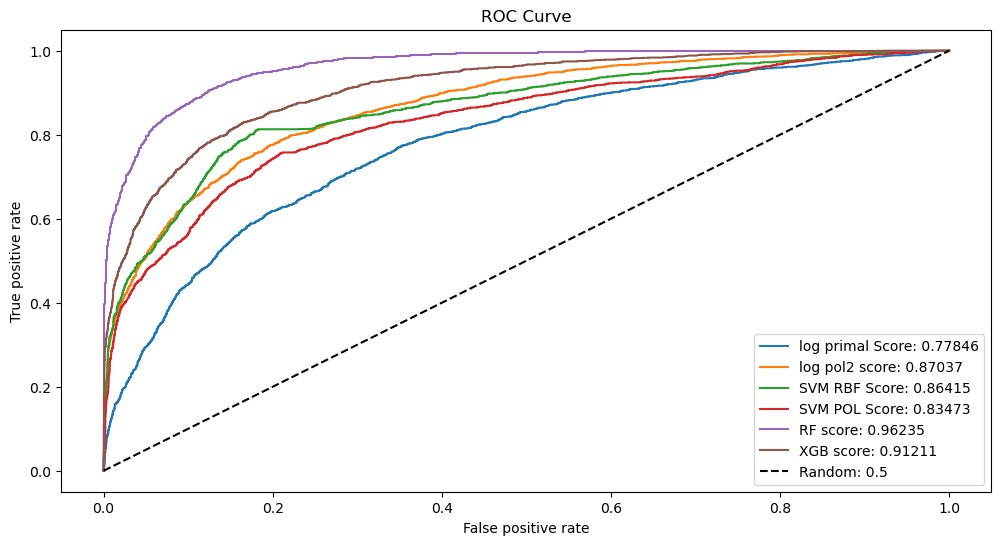

In [85]:
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_log_primal, tpr_log_primal, label = 'log primal Score: ' + str(round(auc_log_primal, 5)))
plt.plot(fpr_log_pol2, tpr_log_pol2, label = 'log pol2 score: ' + str(round(auc_log_pol2, 5)))
plt.plot(fpr_SVM_RBF, tpr_SVM_RBF, label = 'SVM RBF Score: ' + str(round(auc_SVM_RBF, 5)))
plt.plot(fpr_SVM_POL, tpr_SVM_POL, label = 'SVM POL Score: ' + str(round(auc_SVM_POL, 5)))
plt.plot(fpr_RF, tpr_RF, label = 'RF score: ' + str(round(auc_RF, 5)))
plt.plot(fpr_XGB, tpr_XGB, label = 'XGB score: ' + str(round(auc_XGB, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()


In [86]:
#Test model prediction accuracy on test data